# 深度循环神经网络
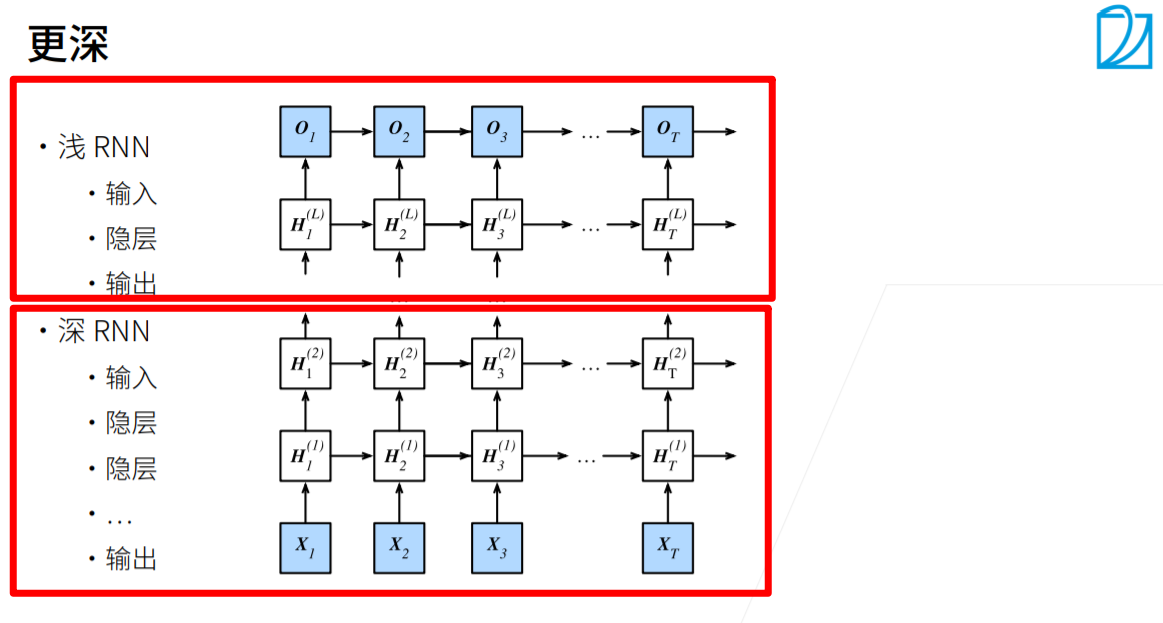
其实深度循环神经网络：就是把每个时间步上输出的H，再作为输出

通过num_layers的值来设定隐藏层数

In [1]:
# 下面两行是防止内核挂掉加的
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size # 其实就是输入的特征
device = d2l.try_gpu()
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers) # 这里和前面不同的地方在于：多了一个num_layers，也就是隐藏层的层数
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

#### 注意：pytorch的gru和lstm是不带输出层的，也就是输出都是h_state，要是想要输出层，那么我们需要自己再写一个全连接层（h_state作为输入）

训练

perplexity 1.0, 213922.0 tokens/sec on cuda:0
time traveller for so it will be convenient to speak of himwas e
traveller with a slight accession ofcheerfulness really thi


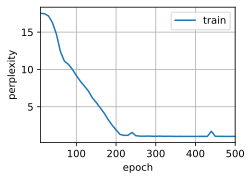

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)